In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("datascientistanna/customers-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/customers-dataset


📊 Dataset loaded: 2000 rows × 8 columns

📋 Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB
None

🔍 Missing Values:
Profession    35
dtype: int64

🔍 Duplicate Rows:
0

📈 Skewness Check:
Work Experience           0.683718
Family Size               0.199263
Age                       0.049222
Spending Score (1-100)    0.004555
CustomerID                0.00000

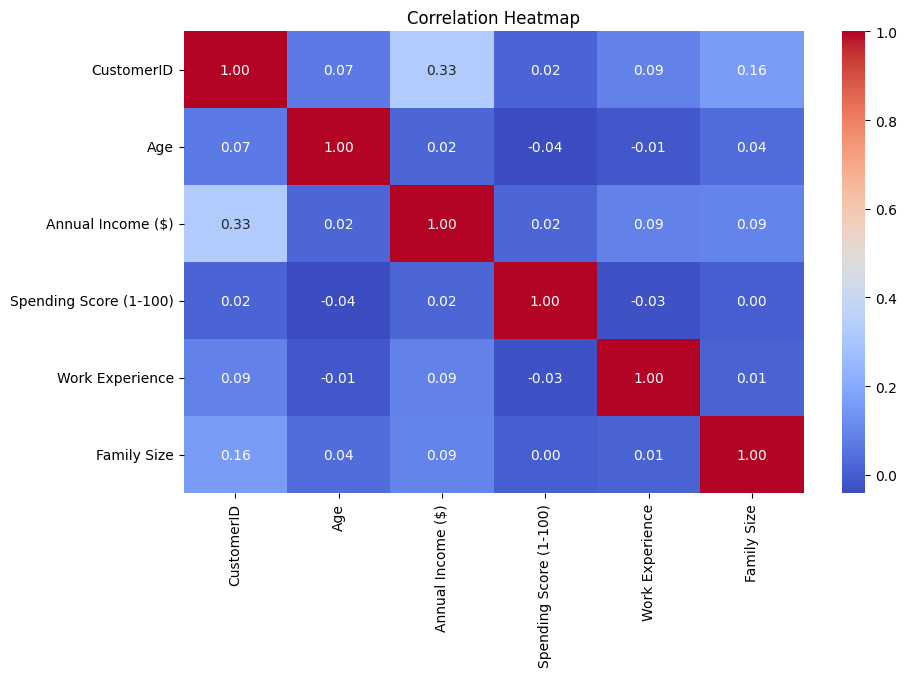

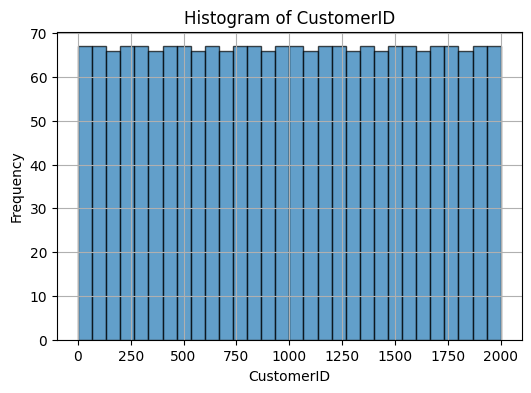

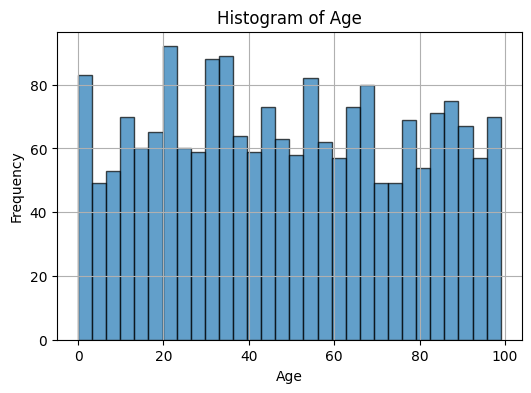

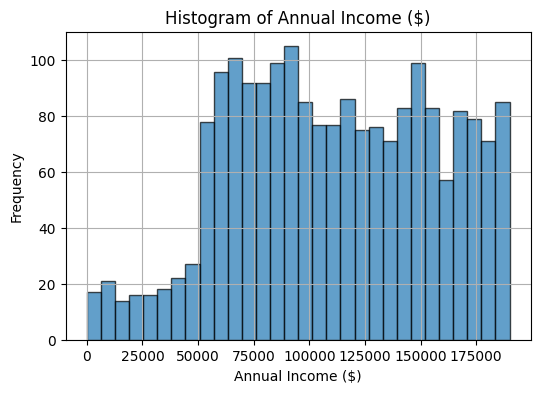

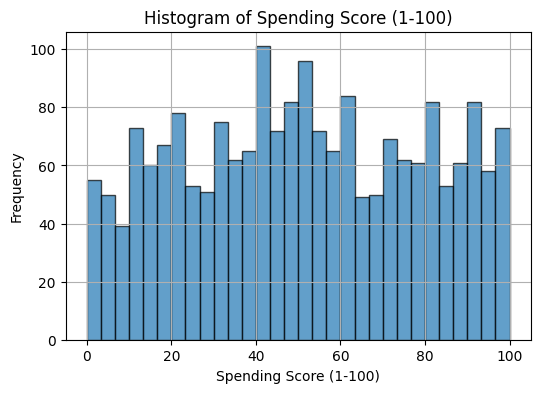

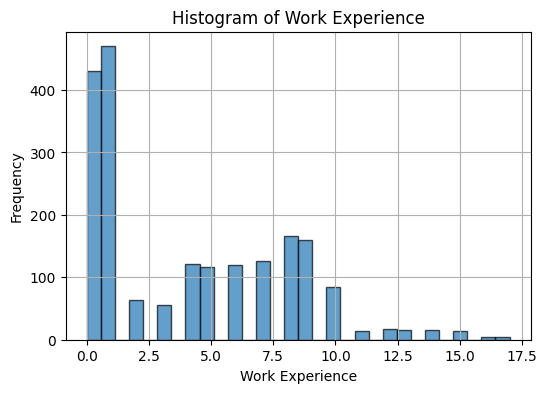

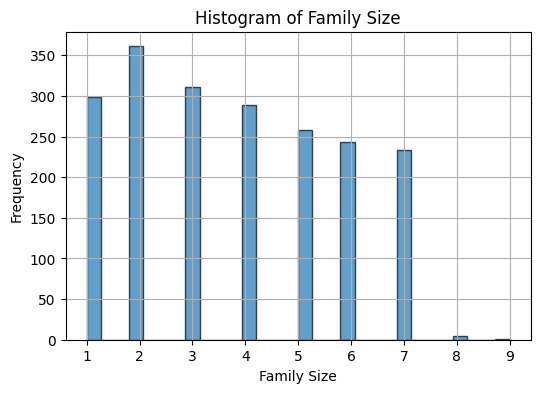

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ====== 1. Load Data ======
df = pd.read_csv("/kaggle/input/customers-dataset/Customers.csv")  # Ganti dengan nama file kamu
print(f"📊 Dataset loaded: {df.shape[0]} rows × {df.shape[1]} columns")

# ====== 2. Basic Info ======
print("\n📋 Basic Info:")
print(df.info())

# ====== 3. Missing Values & Duplicate Rows Check ======
print("\n🔍 Missing Values:")
missing = df.isnull().sum()
print(missing[missing > 0])

print("\n🔍 Duplicate Rows:")
duplicate = df.duplicated().sum()
print(duplicate)

# ====== 4. Skewness Check ======
print("\n📈 Skewness Check:")
skewed_features = df.select_dtypes(include=['number']).apply(lambda x: x.skew()).sort_values(ascending=False)
print(skewed_features)

print("\n📌 Recommendation:")
for col, skew in skewed_features.items():
    if abs(skew) > 1:
        print(f"⚠️ {col} is highly skewed (skew={skew:.2f}). Suggest: Apply log or sqrt transform.")
    elif abs(skew) > 0.5:
        print(f"ℹ️ {col} is moderately skewed (skew={skew:.2f}). Transform optional.")
    else:
        print(f"✅ {col} is fairly symmetric (skew={skew:.2f}). No action needed.")

# ====== 5. Outlier Detection (IQR Method) ======
print("\n📦 Outlier Check (IQR Method):")
for col in df.select_dtypes(include=['number']):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier_count = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
    if outlier_count > 0:
        print(f"⚠️ {col}: {outlier_count} outliers detected.")
    else:
        print(f"✅ {col}: No significant outliers.")

# ====== 6. Correlation Analysis ======
print("\n🔗 Correlation Matrix (Top correlated pairs):")
correlation = df.corr(numeric_only=True)
cor_matrix = correlation.abs().unstack().sort_values(ascending=False).drop_duplicates()
top_corr = cor_matrix[(cor_matrix < 1) & (cor_matrix > 0.7)]
print(top_corr)

print("\n📌 Recommendation:")
for (f1, f2), corr_val in top_corr.items():
    print(f"⚠️ {f1} & {f2} have high correlation ({corr_val:.2f}). Suggest: Keep only one or apply dimensionality reduction (e.g., PCA).")

# ====== 7. Heatmap ======
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# ====== 8. Histogram ======
df_numeric = df.select_dtypes(include=["number"])  # Pilih hanya kolom numerik
for col in df_numeric.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(df_numeric[col], bins=30, edgecolor="black", alpha=0.7)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

In [3]:
# Cek isi data
print(df['Profession'].value_counts())

Profession
Artist           612
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Executive        153
Lawyer           142
Marketing         85
Homemaker         60
Name: count, dtype: int64


In [4]:
df.head(10)

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
5,6,Female,22,58000,76,Artist,0,2
6,7,Female,35,31000,6,Healthcare,1,3
7,8,Female,23,84000,94,Healthcare,1,3
8,9,Male,64,97000,3,Engineer,0,3
9,10,Female,30,98000,72,Artist,1,4


In [8]:
df.drop(columns=['CustomerID'], inplace=True)

In [9]:
df.head(10)

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,Male,19,15000,39,Healthcare,1,4
1,Male,21,35000,81,Engineer,3,3
2,Female,20,86000,6,Engineer,1,1
3,Female,23,59000,77,Lawyer,0,2
4,Female,31,38000,40,Entertainment,2,6
5,Female,22,58000,76,Artist,0,2
6,Female,35,31000,6,Healthcare,1,3
7,Female,23,84000,94,Healthcare,1,3
8,Male,64,97000,3,Engineer,0,3
9,Female,30,98000,72,Artist,1,4


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


=== KMeans Evaluation ===
K=2: Silhouette Score = 0.1206
K=3: Silhouette Score = 0.1127
K=4: Silhouette Score = 0.1068
K=5: Silhouette Score = 0.1132
K=6: Silhouette Score = 0.1136
K=7: Silhouette Score = 0.1118
K=8: Silhouette Score = 0.1128
K=9: Silhouette Score = 0.1126
K=10: Silhouette Score = 0.1122
Best K = 2 with Silhouette Score = 0.1206


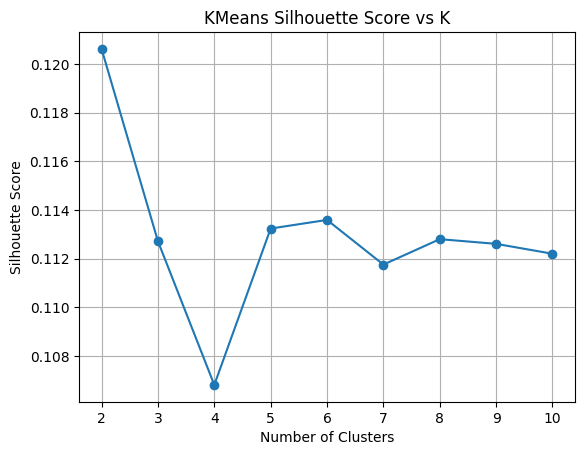


=== DBSCAN Evaluation ===
Silhouette Score: -0.1960

=== Hierarchical Clustering Evaluation ===
Silhouette Score: 0.0957


In [10]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Pisahkan fitur (X)
X = df.copy()

# Deteksi kolom
cat_cols = X.select_dtypes(include='object').columns.tolist()
num_cols = X.select_dtypes(include='number').columns.tolist()

# Pipeline numerik
numeric_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# Pipeline kategorikal
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

# Gabungkan semua preprocessor
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, num_cols),
    ('cat', categorical_pipeline, cat_cols)
])

# Transformasi fit + transform
X_preprocessed = preprocessor.fit_transform(X)

# ================================
# KMEANS: Cari cluster optimal
# ================================
print("=== KMeans Evaluation ===")
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(X_preprocessed)
    score = silhouette_score(X_preprocessed, labels)
    silhouette_scores.append(score)
    print(f"K={k}: Silhouette Score = {score:.4f}")

best_k = K_range[np.argmax(silhouette_scores)]
print(f"Best K = {best_k} with Silhouette Score = {max(silhouette_scores):.4f}")

# Visualisasi Elbow/Silhouette
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('KMeans Silhouette Score vs K')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

# Final KMeans
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init='auto')
kmeans_labels = kmeans_final.fit_predict(X_preprocessed)

# ================================
# DBSCAN
# ================================
print("\n=== DBSCAN Evaluation ===")
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_preprocessed)

# DBSCAN bisa hasilkan -1 untuk noise → harus dicek
if len(set(dbscan_labels)) > 1:
    score = silhouette_score(X_preprocessed, dbscan_labels)
    print(f"Silhouette Score: {score:.4f}")
else:
    print("DBSCAN menghasilkan hanya 1 cluster atau semua noise.")

# ================================
# Hierarchical Clustering
# ================================
print("\n=== Hierarchical Clustering Evaluation ===")
hier = AgglomerativeClustering(n_clusters=best_k)
hier_labels = hier.fit_predict(X_preprocessed)
score = silhouette_score(X_preprocessed, hier_labels)
print(f"Silhouette Score: {score:.4f}")

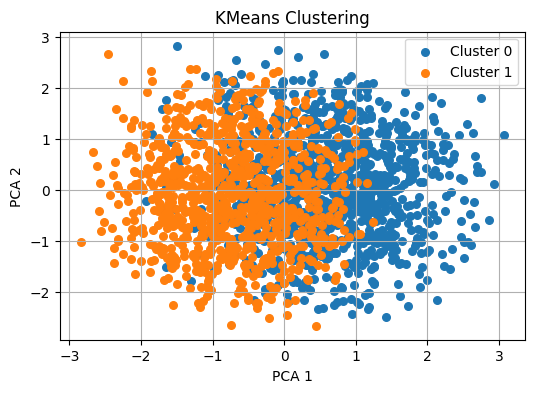

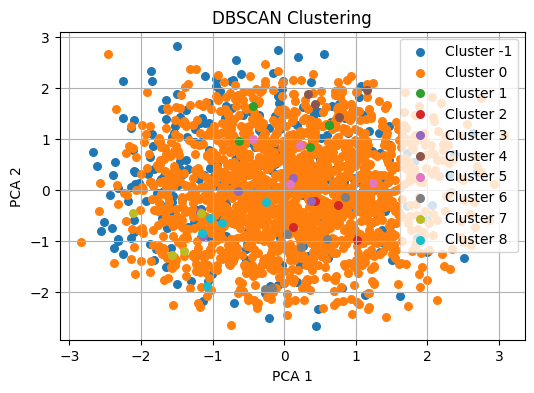

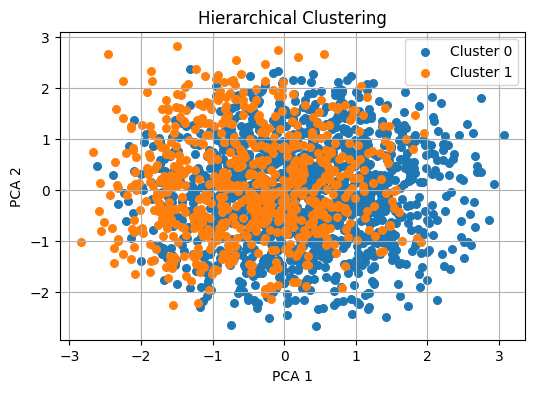

In [12]:
from sklearn.decomposition import PCA

# Reduksi dimensi untuk visualisasi
pca = PCA(n_components=2)
X_2D = pca.fit_transform(X_preprocessed)

def plot_clusters(X_2D, labels, title):
    plt.figure(figsize=(6, 4))
    unique_labels = np.unique(labels)
    for label in unique_labels:
        mask = labels == label
        plt.scatter(X_2D[mask, 0], X_2D[mask, 1], label=f"Cluster {label}", s=30)
    plt.title(title)
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.legend()
    plt.grid(True)
    plt.show()

# Visualisasi KMeans
plot_clusters(X_2D, kmeans_labels, "KMeans Clustering")

# Visualisasi DBSCAN
plot_clusters(X_2D, dbscan_labels, "DBSCAN Clustering")

# Visualisasi Hierarchical
plot_clusters(X_2D, hier_labels, "Hierarchical Clustering")


In [13]:
df_clustered = df.copy()
df_clustered['Cluster'] = kmeans_labels

print("=== Statistik Numerik per Cluster ===")
print(df_clustered.groupby('Cluster')[num_cols].agg(['mean', 'std', 'min', 'max']))

print("\n=== Distribusi Fitur Kategorikal per Cluster ===")
for col in cat_cols:
    print(f"\nFitur: {col}")
    print(df_clustered.groupby('Cluster')[col].value_counts(normalize=True).unstack().fillna(0).round(2))

=== Statistik Numerik per Cluster ===
               Age                    Annual Income ($)                      \
              mean        std min max              mean           std   min   
Cluster                                                                       
0        45.882682  27.814544   0  99     100177.641527  46837.249224     0   
1        52.529158  28.731764   0  99     122972.846652  41196.435296  4000   

                Spending Score (1-100)                     Work Experience  \
            max                   mean        std min  max            mean   
Cluster                                                                      
0        189974              49.851024  28.250645   1  100        3.963687   
1        189945              52.251620  27.522656   0  100        4.263499   

                          Family Size                    
              std min max        mean       std min max  
Cluster                                                  
0

In [14]:
df_clustered.head(10)

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Cluster
0,Male,19,15000,39,Healthcare,1,4,0
1,Male,21,35000,81,Engineer,3,3,0
2,Female,20,86000,6,Engineer,1,1,0
3,Female,23,59000,77,Lawyer,0,2,0
4,Female,31,38000,40,Entertainment,2,6,1
5,Female,22,58000,76,Artist,0,2,0
6,Female,35,31000,6,Healthcare,1,3,0
7,Female,23,84000,94,Healthcare,1,3,0
8,Male,64,97000,3,Engineer,0,3,0
9,Female,30,98000,72,Artist,1,4,0
